In [94]:
# For data structure
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

# For division, avoiding worry about float data for like python3
from __future__ import division
  
import matplotlib
params = {'axes.labelsize': 18,'axes.titlesize':20, 'font.size': 20, 'legend.fontsize': 16, 'xtick.labelsize': 18, 'ytick.labelsize': 18}
matplotlib.rcParams.update(params)

In [102]:
# Major index ETFs

etf_list = ['SPY','QQQ','IWM','DIA','^VIX', 'USO','GLD','GDX']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year-2,end.month,end.day)

# For loop for grabing yahoo finance data and setting as a dataframe
for stock in etf_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [108]:
USO.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-03,38.389999,38.400002,38.240002,38.250000,1447500,38.250000
2014-07-07,38.270000,38.290001,38.049999,38.169998,1428400,38.169998
2014-07-08,38.259998,38.419998,37.980000,38.180000,2418100,38.180000
2014-07-09,37.889999,37.910000,37.619999,37.689999,5838100,37.689999
2014-07-10,37.630001,37.990002,37.590000,37.900002,3672300,37.900002


In [110]:
def ma_macd(stock):
    # plot out several moving averages
    ma_day = [10,20,50,100,200]

    for ma in ma_day:
        column_name = "MA%s" %(str(ma))
        stock[column_name]=Series.rolling(stock['Adj Close'],window=ma).mean()
    
    plt1=stock[['Adj Close','MA10','MA20','MA50','MA100','MA200']].plot(subplots=False,figsize=(16,6))
    plt1.spines['top'].set_color("w")
    plt1.spines['right'].set_color("w")

    # Draw several MACD lines (MACD8,13; MACD13,21; MACD21,34; MACD34,55)
    ema8=stock['Adj Close'].ewm(span=8).mean().values
    ema13=stock['Adj Close'].ewm(span=13).mean().values
    ema21=stock['Adj Close'].ewm(span=21).mean().values
    ema34=stock['Adj Close'].ewm(span=34).mean().values
    #ema55=SPY['Adj Close'].ewm(span=55).mean().values

    stock['MACD8v13'] = ema8 - ema13
    stock['MACD13v21'] = ema13 - ema21
    stock['MACD21v34'] = ema21 - ema34
    #SPY['MACD34v55'] = ema34 - ema55
   
    plt2=stock[['MACD8v13','MACD13v21','MACD21v34']].plot(subplots=False,sharex= plt1, figsize=(16,6))
    plt2.spines['top'].set_color("w")
    plt2.spines['right'].set_color("w")

# 我们可以绘制数个 MACD,期望尽早检出测趋势反转信号.

# (8,13), (13,21), (21,34), (34,55)   4组 斐波那契数字可以覆盖相对短期至中期的趋势, 第三个参数可以被删除.

# MACD (8,13) 已向下越过MACD (21,34), MACD (13,21) 也已向下越过MACD (21,34), 解释上升趋势可能已经逆转


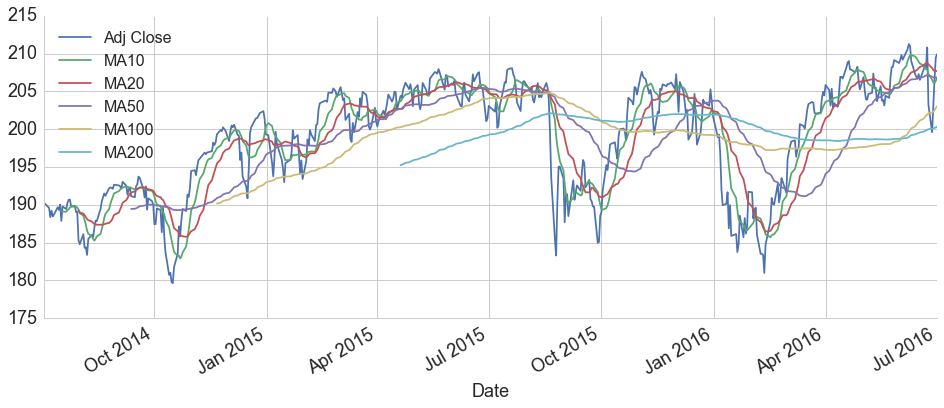

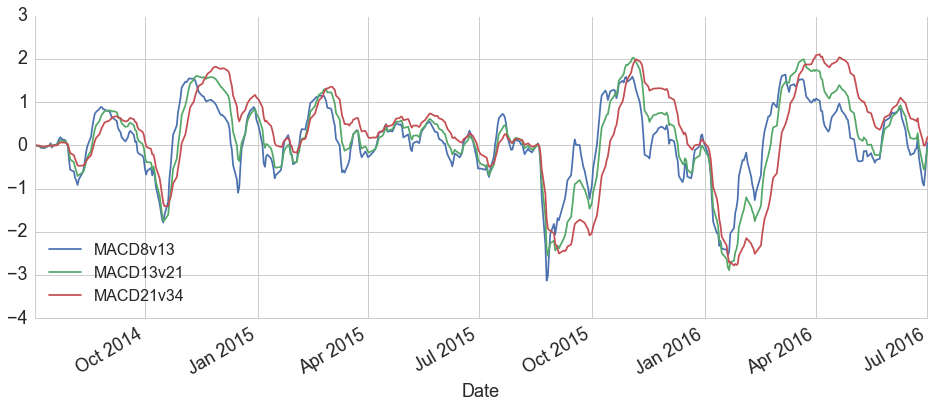

In [111]:
ma_macd(SPY)

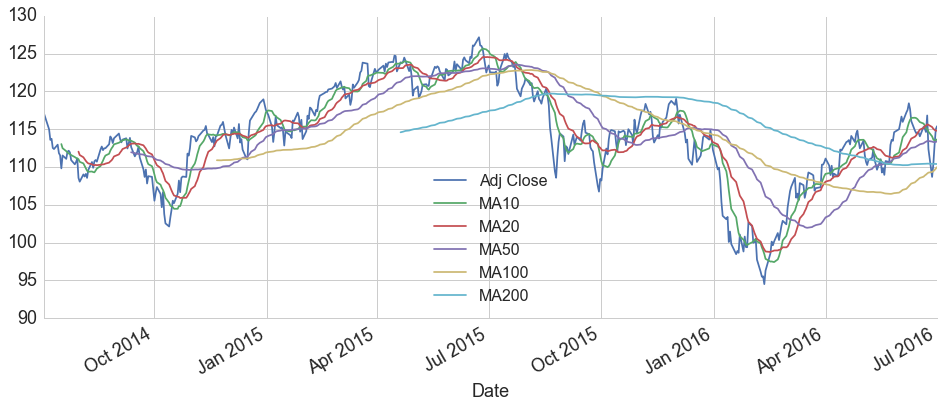

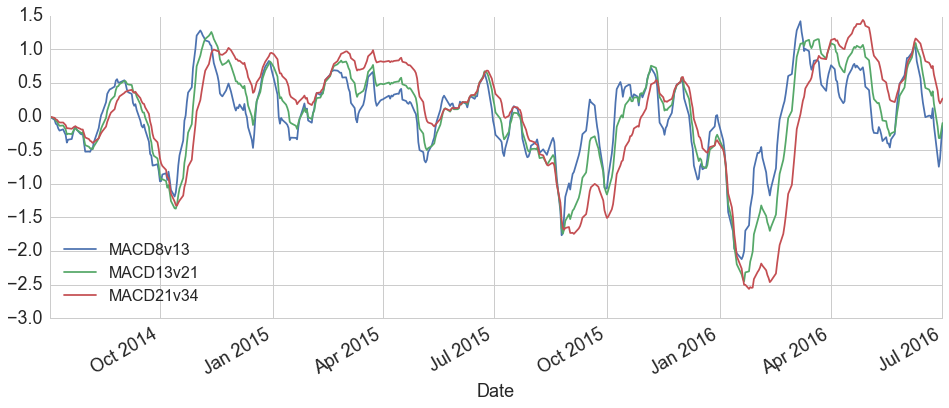

In [112]:
ma_macd(IWM)

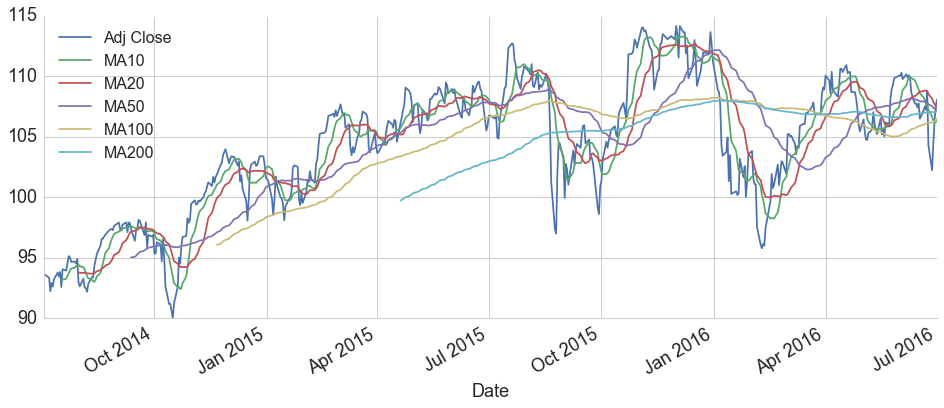

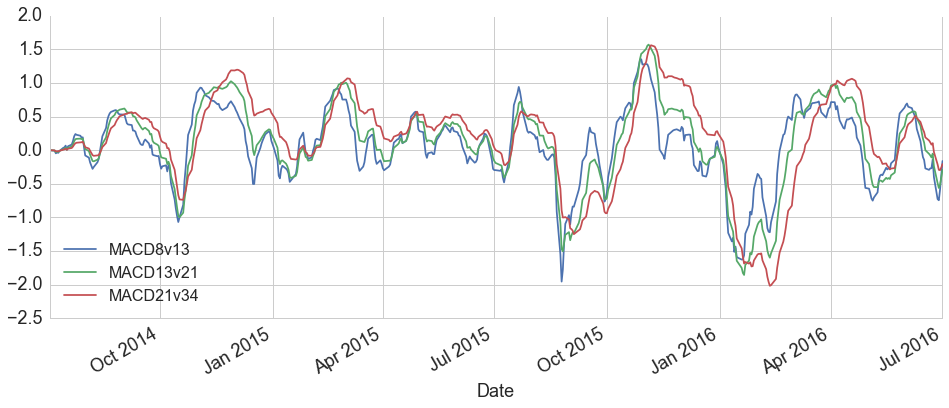

In [113]:
ma_macd(QQQ)

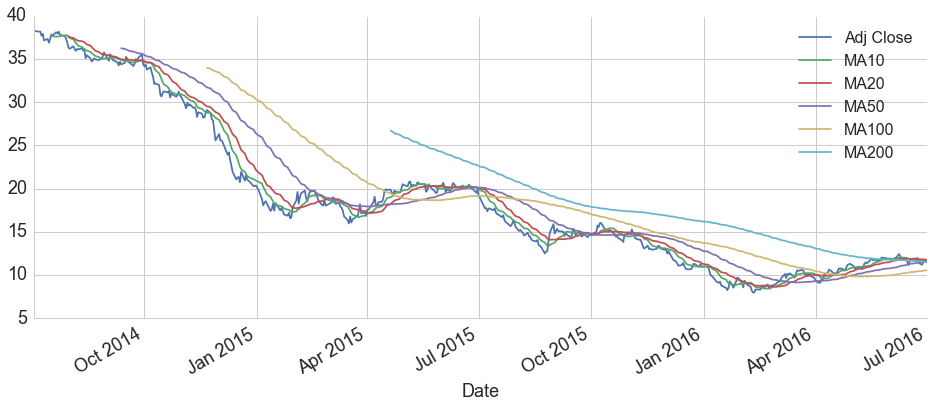

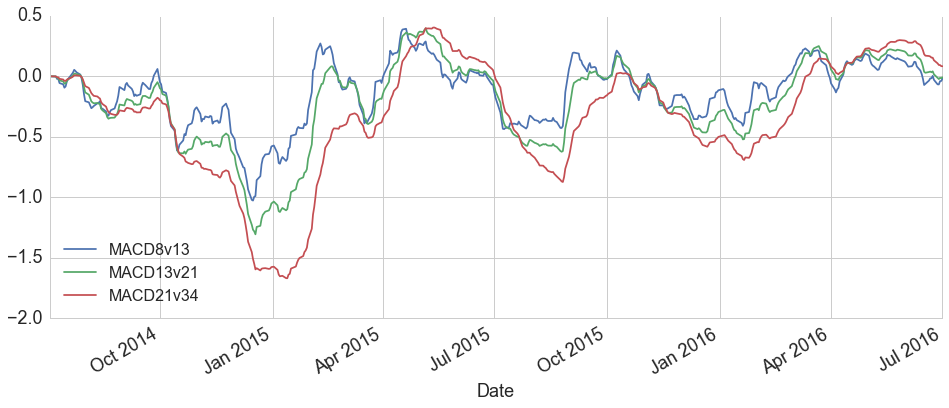

In [114]:
ma_macd(USO)

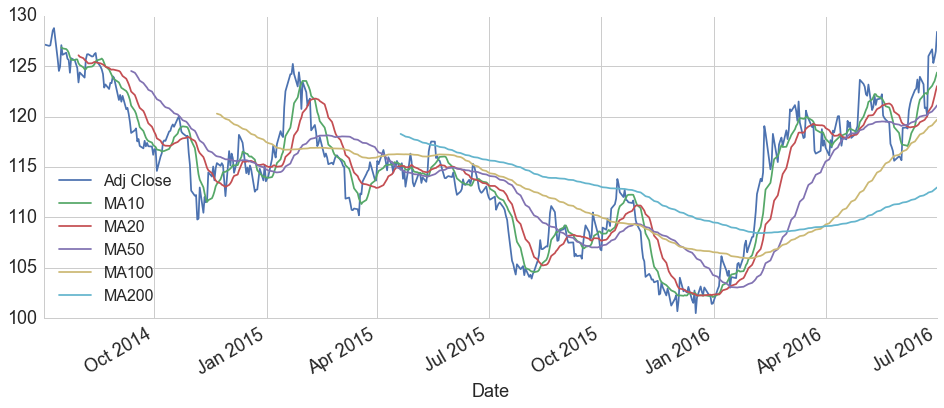

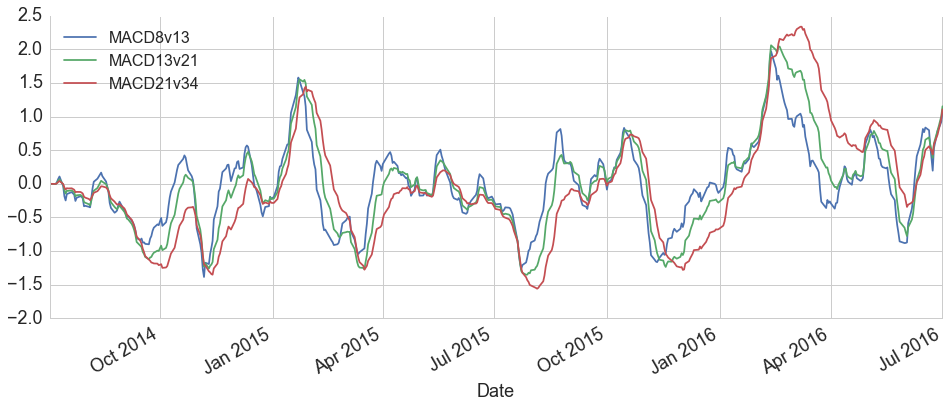

In [115]:
ma_macd(GLD)

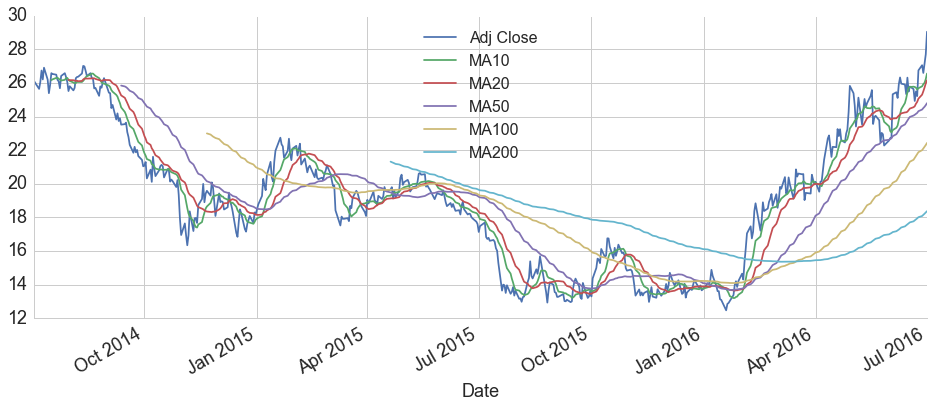

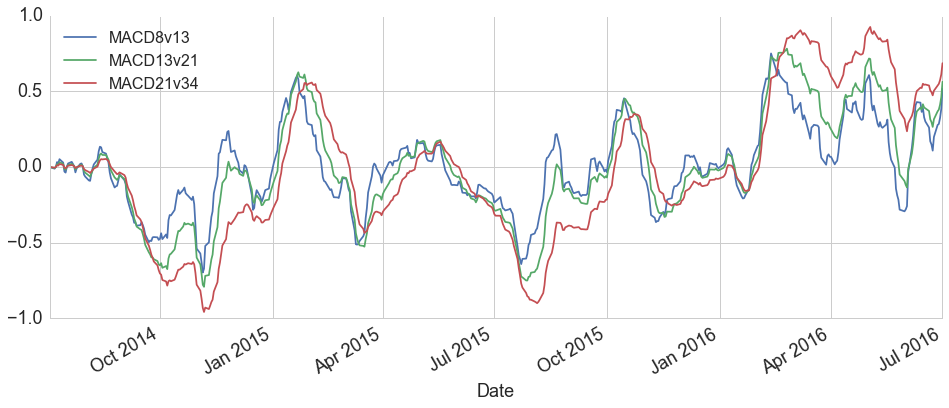

In [116]:
ma_macd(GDX)